# Introduccion a la Visualizacion de Datos.


Algunos años atrás el reto era como obtener millones de datos, pero en la actualidad esto ya no es un problema, no más hay que visitar el sitio web de [ChEMBL](https://www.ebi.ac.uk/chembl/) donde podemos encontrar una cantidad interesante de moléculas bioactivas con ciertas características para ser convertidas en medicamentos.

Si bien el campo de los datos va más allá de su manipulación, también como científicos es valioso desarrollar habilidades relacionadas con la presentación de nuestros hallazgos. Y si quisiéramos ir un poco más allá, algo importante a tener en cuenta aparte de una buena visualización es tener una historia que contar.

En Notebooks anteriores aprendimos a manipular algunos conjuntos de datos y para ello vimos desde lo básico de Python hasta lo más avanzado como lo son los [DataFrame](../2_PART_TWO/2.1_Dataframes.ipynb), ahora es tiempo de aprender a crear gráficas *(Visualizaciones)* de nuestros datos utilizando dos de las librerías más famosas en el mundo `Matplotlib` y `Seaborn`. Para la mayoría de los casos, con la primera de éstas sería más que suficiente, pero para realizar gráficas un poco más complejas vamos a utilizar la segunda. Con ellas dos trataremos de crear la mayoría de visualizaciones más populares.

### Introduccion a Matplotlib

Según el sitio web **Matplotlib es una libreria para la creacion de visualizaciones estáticas, animadas e intercativas en Python**. Simple, ¿recuerdan el concepto de Libreria? Si no [aqui](https://www.geeksforgeeks.org/libraries-in-python/) pueden leer un poco más al respecto. No hay mucho que agregar, más alla de que la libreria ya se encuentra instalada como parte de las dependencias del ambiente virtual del curso.

> En caso que la librería no esté instalada, puede utilizar el comnado `pip install matplotlib`, o `conda install matplotlib`.

Antes de empezar a graficar es bueno desarrollar un entendimiento basico de como funciona esta libreria, dado que en muchos escenarios veremos que es necesario realizar ciertas configuraciones.

#### El modulo Pyplot

Por lo general el módulo `pyplot` es el foco de interós cuando queremos gráficas con `Matplotlib`, a pesar de que la librería posee una gran variedad de funcionalidades asociadas a otras características como la configuraciín de los estilos y las animaciones. Por lo general, siempre importaremos el modulo de la siguiente forma:

```
    import matplotlib.pyplot as plt
```

Para crear una gráfica o **plot** debemos seguir una serie de pasos o llamados de ciertas funciones *(métodos)* que pertenecen al módulo `pyplot`.


Veamos cómo se hace a continuación, empecemos importando el dataset de [diabetes](./data/diabetes.data) y convirtiéndolo en un DataFrame:

In [154]:
# Se importa la libreria Pandas
import pandas as pd

# Se importa los datos del dataset y se convierten en un DataFrame.
#df_iris = pd.read_csv("./data/iris.data", names=["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo", "clase"])
#df_iris.head()

# Se importan los datos del dataset de diabetes.data y automaticamente se convierte en un DataFrame.
df_diabetes = pd.read_csv("./data/diabetes.data", delim_whitespace=True, names=["date", "time", "code", "value"])

# Se filtran el DataFrame para los valores en donde el codigo sea 58
df_diabetes_measurement = df_diabetes[df_diabetes['code'] == 58]
df_diabetes_measurement["datetime"] = pd.to_datetime(df_diabetes_measurement["date"] + ' ' + df_diabetes_measurement["time"])

df_diabetes_measurement

/var/folders/1m/34ryljzs59j6lq26jyh4yxv80000gp/T/ipykernel_51653/978452456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes_measurement["datetime"] = pd.to_datetime(df_diabetes_measurement["date"] + ' ' + df_diabetes_measurement["time"])


,date,time,code,value,datetime
0,04-21-1991,9:09,58,100,1991-04-21 09:09:00
6,04-22-1991,7:35,58,216,1991-04-22 07:35:00
12,04-23-1991,7:25,58,257,1991-04-23 07:25:00
17,04-24-1991,7:52,58,239,1991-04-24 07:52:00
24,04-25-1991,7:29,58,67,1991-04-25 07:29:00
...,...,...,...,...,...
913,08-30-1991,9:04,58,253,1991-08-30 09:04:00
919,08-31-1991,9:38,58,165,1991-08-31 09:38:00
926,09-01-1991,9:02,58,183,1991-09-01 09:02:00
933,09-02-1991,8:51,58,168,1991-09-02 08:51:00


Para la creación de la gráfica es necesario invocar el método `plot`, de la siguiente forma:

```
    plt.plot(x-axis, y-axis)
```

en donde `x-asix` y `y-axis` son los valores para los ejes respectivos del gráfico, y notemos que aun a este punto no tenemos nuestra visualización, porque para ello es necesario invocar el método `show` como lo vemos a continuación:

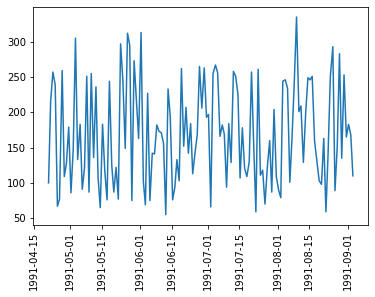

In [25]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se crea la grafica por medio del metodo plot
#plt.plot(df_iris.index, df_iris.ancho_petalo)
plt.plot(df_diabetes_measurement.datetime, df_diabetes_measurement.value)

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

Como resultado tenemos un gráfico de líneas o por su nombre en inglés un **Line Plot**. En elk se puede ver los niveles de glucosa antes del desayuno durante cierto tiempo, exactamente desde el 15 de Abril de 1991 hasta el 1 de Sept de 1991 de los diferentes pacientes de diabetes .

En resumen, para la realización de una gráfica con `Matplotlib`, se deben seguir los siguientes pasos:

1. Se debe importar el módulo `pyplot` de la librería `Matplotlib`
2. Se debe inicializar la gráfica por medio del método `plot`.
3. Una vez terminada la inicialización y configuración del **plot** se debe invocar la visualización por medio del método `show`.



A veces es necesario crear una grafica de lineas para comparar dos variables, por ejemplo si quisieramos ver la grafica de la evolucion de los niveles de glucosa antes del desayuno y  largo y ancho del petalo y despues del almuerzo, hariamos lo siguiente:


/var/folders/1m/34ryljzs59j6lq26jyh4yxv80000gp/T/ipykernel_15813/4277106560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes_prelunch["datetime"] = pd.to_datetime(df_diabetes_prelunch["date"] + ' ' + df_diabetes_prelunch["time"])


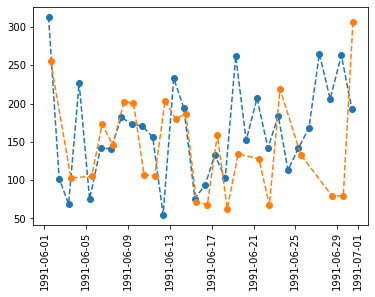

In [67]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se filtran el DataFrame para los valores en donde el codigo sea 60
df_diabetes_prelunch = df_diabetes[df_diabetes['code'] == 60]
df_diabetes_prelunch["datetime"] = pd.to_datetime(df_diabetes_prelunch["date"] + ' ' + df_diabetes_prelunch["time"])
df_diabetes_prelunch = df_diabetes_prelunch.loc[(df_diabetes_prelunch['datetime'] >= '1991-06-01') & (df_diabetes_prelunch['datetime'] < '1991-07-01')]

df_diabetes_measurement = df_diabetes_measurement.loc[(df_diabetes_measurement['datetime'] >= '1991-06-01') & (df_diabetes_measurement['datetime'] < '1991-07-01')]

# Se crea la grafica por medio del metodo plot
plt.plot(df_diabetes_measurement.datetime, df_diabetes_measurement.value, 'o--')
plt.plot(df_diabetes_prelunch.datetime, df_diabetes_prelunch.value, 'o--')

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

Asi que de esta forma podemos comparar los niveles de glucos previos al desayuno y al almuerzo. Aun asi hay la grafica a primera vista no nos dice de que se trata, que tal si le agregmos un poco de presentacion.

Ahora, vamos a darle un título y un nombre a sus ejes, y porque no visualizar los datos en una grilla:

/var/folders/1m/34ryljzs59j6lq26jyh4yxv80000gp/T/ipykernel_15813/1817261868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes_prelunch["datetime"] = pd.to_datetime(df_diabetes_prelunch["date"] + ' ' + df_diabetes_prelunch["time"])


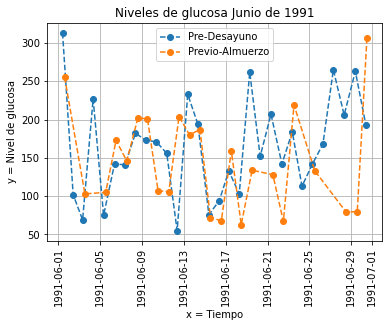

In [70]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se filtran el DataFrame para los valores en donde el codigo sea 60
df_diabetes_prelunch = df_diabetes[df_diabetes['code'] == 60]
df_diabetes_prelunch["datetime"] = pd.to_datetime(df_diabetes_prelunch["date"] + ' ' + df_diabetes_prelunch["time"])
df_diabetes_prelunch = df_diabetes_prelunch.loc[(df_diabetes_prelunch['datetime'] >= '1991-06-01') & (df_diabetes_prelunch['datetime'] < '1991-07-01')]

df_diabetes_measurement = df_diabetes_measurement.loc[(df_diabetes_measurement['datetime'] >= '1991-06-01') & (df_diabetes_measurement['datetime'] < '1991-07-01')]

# Se crea la grafica por medio del metodo plot
plt.plot(df_diabetes_measurement.datetime, df_diabetes_measurement.value, 'o--')
plt.plot(df_diabetes_prelunch.datetime, df_diabetes_prelunch.value, 'o--')

# Se habilita la grilla
plt.grid(True)

# Se le da un nombre a los ejes
plt.xlabel('x = Tiempo')
plt.ylabel('y = Nivel de glucosa')

# Se le da un titulo a la grafica
plt.title('Niveles de glucosa Junio de 1991')

# Se configura las leyendas de las lineas graficadas
plt.legend(['Pre-Desayuno', 'Previo-Almuerzo'])

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

Hasta aquí hemos visto como crear un gráfico de una línea y de multiples lineas y con ello hemos aprendido algunos de los métodos básicos de configuración de la libreria `Matplotlib`, ahora es el turno para configurar `Colores`, `Estilos` y `Marcadores` en la jerga de la libreria.

En especial hablaremos del tercer parametro del metodo `plot`:

```
    plt.plot(x, y, '[color][marker][linestyle]')
```

En este caso y retomando la gráfica anterior cambiaremos el color de las líneas:

/var/folders/1m/34ryljzs59j6lq26jyh4yxv80000gp/T/ipykernel_51653/129179458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes_prelunch["datetime"] = pd.to_datetime(df_diabetes_prelunch["date"] + ' ' + df_diabetes_prelunch["time"])


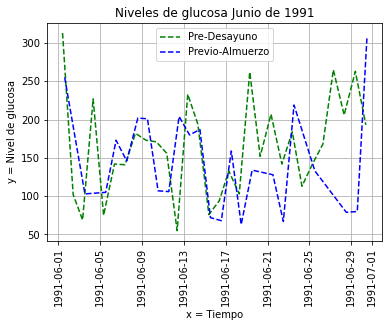

In [155]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se filtran el DataFrame para los valores en donde el codigo sea 60
df_diabetes_prelunch = df_diabetes[df_diabetes['code'] == 60]
df_diabetes_prelunch["datetime"] = pd.to_datetime(df_diabetes_prelunch["date"] + ' ' + df_diabetes_prelunch["time"])
df_diabetes_prelunch = df_diabetes_prelunch.loc[(df_diabetes_prelunch['datetime'] >= '1991-06-01') & (df_diabetes_prelunch['datetime'] < '1991-07-01')]

df_diabetes_measurement = df_diabetes_measurement.loc[(df_diabetes_measurement['datetime'] >= '1991-06-01') & (df_diabetes_measurement['datetime'] < '1991-07-01')]

# Se crea la grafica por medio del metodo plot
plt.plot(df_diabetes_measurement.datetime, df_diabetes_measurement.value, 'g--')
plt.plot(df_diabetes_prelunch.datetime, df_diabetes_prelunch.value, 'b--')

# Se habilita la grilla
plt.grid(True)

# Se le da un nombre a los ejes
plt.xlabel('x = Tiempo')
plt.ylabel('y = Nivel de glucosa')

# Se le da un titulo a la grafica
plt.title('Niveles de glucosa Junio de 1991')

# Se configura las leyendas de las lineas graficadas
plt.legend(['Pre-Desayuno', 'Previo-Almuerzo'])

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

A pesar de que nuestra salida es la misma, las lineas tienen ahora un estilo diferente. Aqui el unico cambio fue el tercer argumento del metodo `plot`, en donde se pueden configurar las opciones de visualizaciones y estilos de las lineas. 

Para saber como darle colores, estilos y marcadores a tus graficas lo mejores es que des [click aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

Tambien es facil crear histogramas

<AxesSubplot:ylabel='Frequency'>

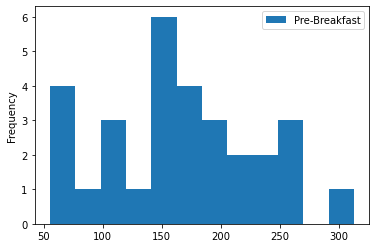

In [180]:
df_hist = pd.DataFrame({
    'Pre-Breakfast': df_diabetes_measurement.iloc[0:50].value, 
#    'Pre-Lunch': df_diabetes_prelunch[0:10].value
})
df_hist.plot.hist(bins=12)
#df_diabetes_prelunch[0:10]

### Gráficando con Pandas

Desde la libreria de `Pandas` poodemos invocar directamente la creacion de una grafica. Lo interesante es que aunque los objetos mas usuales de la libreria, como lo son `Series` y `DataFrame` tiene su propio metodo `plot`, que no es mas que una envoltura del metodo `plot` de `Matplotlib`.

Veamos como funciona intentando realizar la visualizacion de las clases de iris presentes en el dataset.


#### Grafico de Barras

Otra de las visualizaciones mas conocidas es el Grafico de Barras o en Ingles el Bar Chart. Por lo general estos son los tipos de visualizaciones con las que quizás más interactuamos y nos encontramos familiarizados, aunque no seamos tan letrados en el universo de las estadísticas, este es un gráfico que se entiende a primera vista.

Tratemos ahora de visualizar y resumir la informacion de nuestro dataset [adult](./data/adult.data):



In [1]:
import pandas as pd
import numpy as np
#df_iris_clases = pd.DataFrame([
#        len(df_iris.query('clase == "Iris-setosa"')),
#        len(df_iris.query('clase == "Iris-virginica"')),
#        len(df_iris.query('clase == "Iris-versicolor"'))
#    ],
#   columns=["total"],
#    index=[
#        "Iris-setosa",
#        "Iris-virginica",
#        "Iris-versicolor"
#    ]
#)

# 
df_adults = pd.read_csv("./data/adult.data",
    names=['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'income'],
    header=None,
    skipinitialspace=True
    )
df_adults.dtypes
df_adults.query('income == "<=50K"')
df_adults
#df_iris_clases.plot.bar(y=["total"], rot=0)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Ahora bien, graficos el estado marital de los adultos presentes en el dataset:

<AxesSubplot:xlabel='label'>

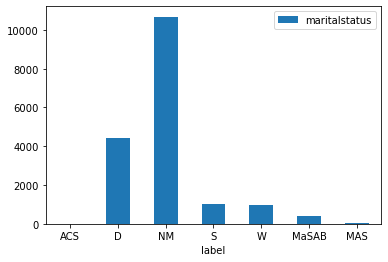

In [2]:
df_adults_status = pd.DataFrame({
    'label': ['ACS', 'D', 'NM', 'S', 'W', 'MaSAB', 'MAS'],
    'maritalstatus': [
       len(df_adults.query('maritalstatus == "arried-civ-spouse"')),
       len(df_adults.query('maritalstatus == "Divorced"')),
       len(df_adults.query('maritalstatus == "Never-married"')),
       len(df_adults.query('maritalstatus == "Separated"')),
       len(df_adults.query('maritalstatus == "Widowed"')),
       len(df_adults.query('maritalstatus == "Married-spouse-absent"')),
       len(df_adults.query('maritalstatus == "Married-AF-spouse"'))
   ]
})
df_adults_status.plot.bar(x='label', y='maritalstatus', rot=0)

In [2]:
df_adults.maritalstatus.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: maritalstatus, dtype: int64

Ahora agreguemos dos plots, para saber quienes bajo la categoria del estado marital ganan entre >= 50 y <= 50:

<AxesSubplot:>

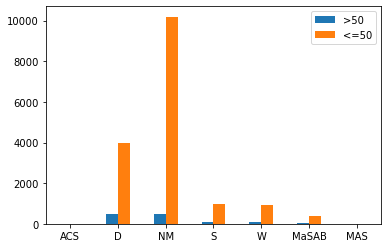

In [3]:
df_adults_status = pd.DataFrame({
    '>50': [
        len(df_adults.query('maritalstatus == "arried-civ-spouse"').query('income == ">50K"')),
        len(df_adults.query('maritalstatus == "Divorced"').query('income == ">50K"')),
        len(df_adults.query('maritalstatus == "Never-married"').query('income == ">50K"')),
        len(df_adults.query('maritalstatus == "Separated"').query('income == ">50K"')),
        len(df_adults.query('maritalstatus == "Widowed"').query('income == ">50K"')),
        len(df_adults.query('maritalstatus == "Married-spouse-absent"').query('income == ">50K"')),
        len(df_adults.query('maritalstatus == "Married-AF-spouse"').query('income == ">50K"'))
    ],
    '<=50': [
        len(df_adults.query('maritalstatus == "arried-civ-spouse"').query('income == "<=50K"')),
        len(df_adults.query('maritalstatus == "Divorced"').query('income == "<=50K"')),
        len(df_adults.query('maritalstatus == "Never-married"').query('income == "<=50K"')),
        len(df_adults.query('maritalstatus == "Separated"').query('income == "<=50K"')),
        len(df_adults.query('maritalstatus == "Widowed"').query('income == "<=50K"')),
        len(df_adults.query('maritalstatus == "Married-spouse-absent"').query('income == "<=50K"')),
        len(df_adults.query('maritalstatus == "Married-AF-spouse"').query('income == "<=50K"'))
    ]
},
index=['ACS', 'D', 'NM', 'S', 'W', 'MaSAB', 'MAS']
)
df_adults_status.plot.bar(rot=0, stacked=False, subplots=False)

Ahora podemos comparar como se aprecia en el grafico anterior de los adultos por estado marital quienes ganan mas de 50K.

#### Grafico de Pie con Pandas

Ahora vamos a ver que ocupacion tienen los adultos?

<AxesSubplot:ylabel='occupation'>

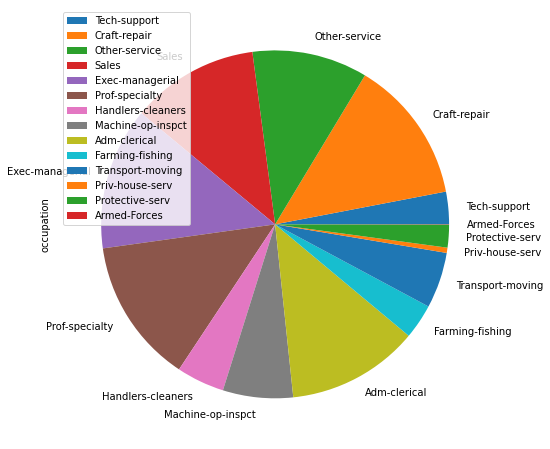

In [4]:

df_adults_occupations = pd.DataFrame({
    'occupation': [
        len(df_adults.query('occupation == "Tech-support"')),
        len(df_adults.query('occupation == "Craft-repair"')),
        len(df_adults.query('occupation == "Other-service"')),
        len(df_adults.query('occupation == "Sales"')),
        len(df_adults.query('occupation == "Exec-managerial"')),
        len(df_adults.query('occupation == "Prof-specialty"')),
        len(df_adults.query('occupation == "Handlers-cleaners"')),
        len(df_adults.query('occupation == "Machine-op-inspct"')),
        len(df_adults.query('occupation == "Adm-clerical"')),
        len(df_adults.query('occupation == "Farming-fishing"')),
        len(df_adults.query('occupation == "Transport-moving"')),
        len(df_adults.query('occupation == "Priv-house-serv"')),
        len(df_adults.query('occupation == "Protective-serv"')),
        len(df_adults.query('occupation == "Armed-Forces"'))
    ],
    '<=50K': [
        len(df_adults.query('occupation == "Tech-support"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Craft-repair"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Other-service"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Sales"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Exec-managerial"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Prof-specialty"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Handlers-cleaners"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Machine-op-inspct"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Adm-clerical"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Farming-fishing"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Transport-moving"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Priv-house-serv"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Protective-serv"').query('income == "<=50K"')),
        len(df_adults.query('occupation == "Armed-Forces"').query('income == "<=50K"'))
    ],
    '>50K': [
        len(df_adults.query('occupation == "Tech-support"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Craft-repair"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Other-service"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Sales"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Exec-managerial"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Prof-specialty"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Handlers-cleaners"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Machine-op-inspct"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Adm-clerical"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Farming-fishing"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Transport-moving"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Priv-house-serv"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Protective-serv"').query('income == ">50K"')),
        len(df_adults.query('occupation == "Armed-Forces"').query('income == ">50K"'))
    ]
},
index=[
    'Tech-support',
    'Craft-repair',
    'Other-service',
    'Sales',
    'Exec-managerial',
    'Prof-specialty',
    'Handlers-cleaners',
    'Machine-op-inspct',
    'Adm-clerical',
    'Farming-fishing',
    'Transport-moving', 
    'Priv-house-serv',
    'Protective-serv',
    'Armed-Forces'
])

df_adults_occupations.plot.pie(y='occupation', figsize=(8, 8))

Ahora hagamos un subplot:

array([<AxesSubplot:ylabel='occupation'>, <AxesSubplot:ylabel='<=50K'>,
       <AxesSubplot:ylabel='>50K'>], dtype=object)

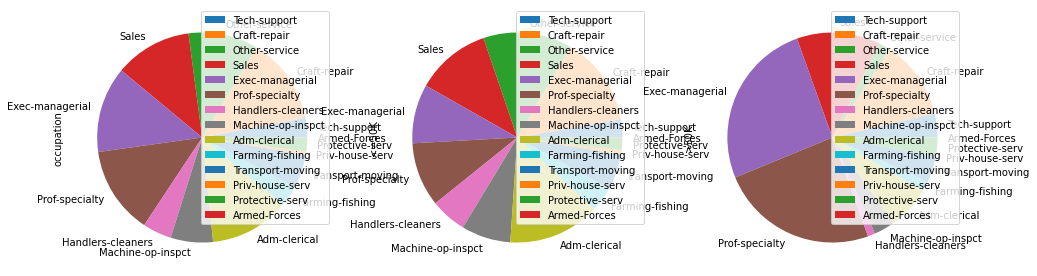

In [152]:
df_adults_occupations.plot.pie(subplots=True, figsize=(16, 16))

Por ahora podemos identifar que tan solo hay 50 observaciones de cada clase, pero queremos un poco mas de detalle, hay varias estadisticas en juego asi que vamos a darle un poc mas de vida a nuestra visualizacion:
    

In [188]:
import numpy as np

# Se importa la libreria Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Se importa los datos del dataset y se convierten en un DataFrame.
df_iris = pd.read_csv("./data/iris.data", names=["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo", "clase"])
df_iris.head()

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


¿Y que podemos decir a través del grafico? Que tal la Iris-Virginicas en proporción a las demás sus sépalos y pétalos son mucho mas grandes.

Ahora a la pregunta tendra algo que ver el ancho del sepalo con el ancho del petalo? Para esto daremos paso a `Seaborn`.


### Graficando con Seaborn

Aqui la idea es crear un Scatter Plot en donde pueda relacionar dos variables.

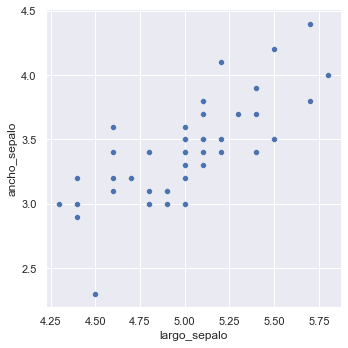

In [187]:

sns.relplot(data=df_iris.query('clase == "Iris-setosa"'), x="largo_sepalo", y="ancho_sepalo")

Esto en cierta medida, muestra la relacion que existe entre el largo del petalo y el ancho, que claramente sigue una regresion lineal. Ahora sera que podemos visualizar todo el dataset pero agrupado por color?

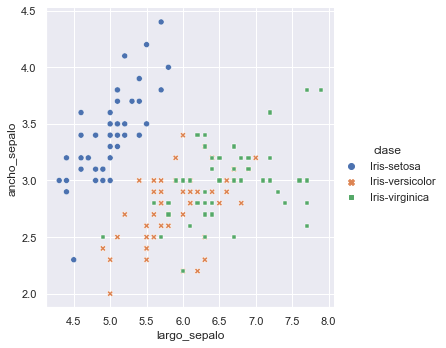

In [197]:
sns.relplot(data=df_iris, x="largo_sepalo", y="ancho_sepalo", hue="clase", style="clase")

Quizas un solo grafico sea complejo de leer. Miremos el uso de Facets.

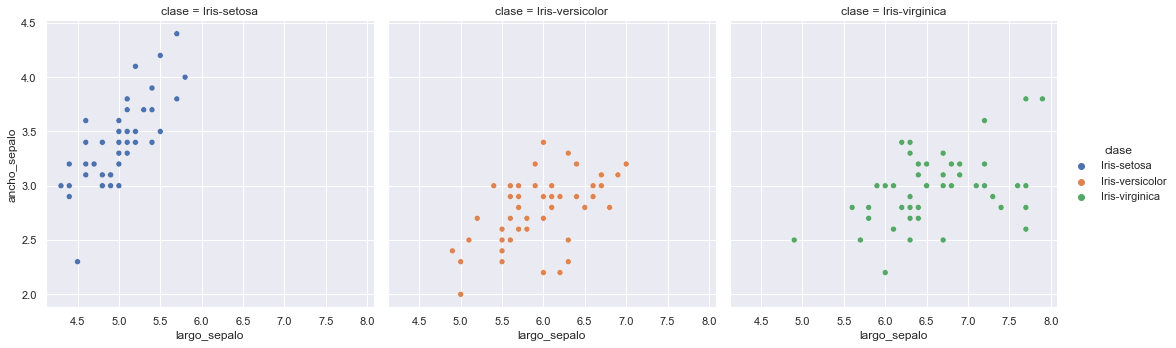

In [196]:
sns.relplot(data=df_iris, x="largo_sepalo", y="ancho_sepalo",  hue="clase", col="clase")

O mejor

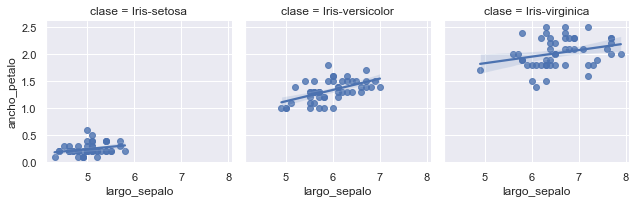

In [200]:
g = sns.FacetGrid(df_iris, col="clase")
g.map(sns.regplot, "largo_sepalo", "ancho_petalo")

Y para finalizar, tratemos de comparar las clases de las florez por medio de un Grafico Radar:

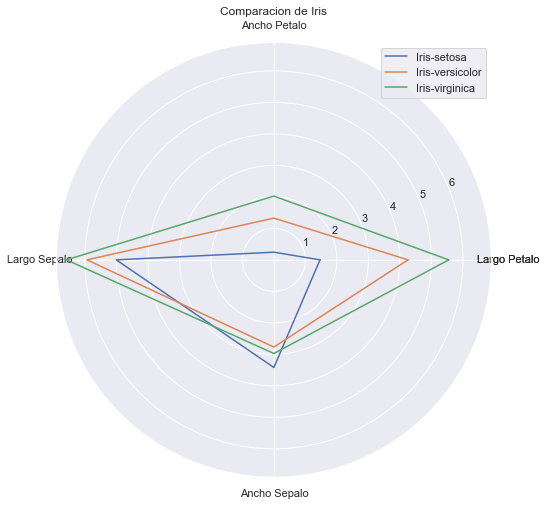

,largo_petalo,ancho_petalo,largo_sepalo,ancho_sepalo
Iris-setosa,1.464,0.244,5.006,3.418
Iris-versicolor,4.260,1.326,5.936,2.770
Iris-virginica,5.552,2.026,6.588,2.974


In [260]:
df_radar = pd.DataFrame(data={
    'largo_petalo': [
        df_iris.query('clase == "Iris-setosa"').largo_petalo.mean(),
        df_iris.query('clase == "Iris-versicolor"').largo_petalo.mean(),
        df_iris.query('clase == "Iris-virginica"').largo_petalo.mean()
    ],
    'ancho_petalo': [
        df_iris.query('clase == "Iris-setosa"').ancho_petalo.mean(),
        df_iris.query('clase == "Iris-versicolor"').ancho_petalo.mean(),
        df_iris.query('clase == "Iris-virginica"').ancho_petalo.mean()
    ],
    'largo_sepalo': [
        df_iris.query('clase == "Iris-setosa"').largo_sepalo.mean(),
        df_iris.query('clase == "Iris-versicolor"').largo_sepalo.mean(),
        df_iris.query('clase == "Iris-virginica"').largo_sepalo.mean()
    ],
    'ancho_sepalo': [
        df_iris.query('clase == "Iris-setosa"').ancho_sepalo.mean(),
        df_iris.query('clase == "Iris-versicolor"').ancho_sepalo.mean(),
        df_iris.query('clase == "Iris-virginica"').ancho_sepalo.mean()
    ]
},
index=["Iris-setosa", "Iris-versicolor", "Iris-virginica", ]
)

# NUmpy.Normalize
#print(df_radar.iloc[[0]].values.tolist()[0][0])
#df_radar.iloc[[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len([*df_radar.iloc[[0]].values.tolist()[0], df_radar.iloc[[0]].values.tolist()[0][0]]))
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

plt.plot(label_loc, [*df_radar.iloc[[0]].values.tolist()[0], df_radar.iloc[[0]].values.tolist()[0][0]], label="Iris-setosa")
plt.plot(label_loc, [*df_radar.iloc[[1]].values.tolist()[0], df_radar.iloc[[1]].values.tolist()[0][0]], label="Iris-versicolor")
plt.plot(label_loc, [*df_radar.iloc[[2]].values.tolist()[0], df_radar.iloc[[2]].values.tolist()[0][0]], label="Iris-virginica")

plt.thetagrids(np.degrees(label_loc), labels=['Largo Petalo', 'Ancho Petalo', 'Largo Sepalo', 'Ancho Sepalo', 'Largo Petalo'])

plt.title('Comparacion de Iris')
plt.legend()
plt.show()

#plt.plot()
df_radar


# NO revisar de aqui para abajo

Como se puede ver en el grafico, visualizamos como el ancho del petalo ha variado en funcion del tiempo, aunque en el eje horizontal tecnicamente no hagamos referencia al tiempo.

Que tal ahora si intentamos graficar un tipico, pero visualmente sencillo Scatter Plot?, para ello debemos ejecutar el metodo `plot` como se muestra a continuacion:

```
    plt.plot(column, column, '[marker][linestyle][color]', data)
```

Graficemos el *largo del sepalo* en relacion con su ancho:


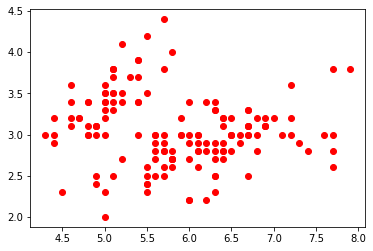

In [15]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se crea la grafica por medio del metodo plot
plt.plot('largo_sepalo', 'ancho_sepalo', 'or', data=df_iris)

# Se visualiza la grafica de Scatter Plot
plt.show()

Por suerte la libreria de `Pandas` tiene un componente de visualizacion el cual es powered by `Matplotlib`, aunque esto tiene sus ventajas tambien tiene un costo asociado, se pierde un poco de flexibilidad, aun asi es un buen punto de partida.



Es bonito, no? Inteligentemente `plot` recibio el *DataFrame* y accedio a sus columnas por medios de los *strings* pasados como parametros. Si quieren saber un poco mas de la configuracion de estilos para este tipo de graficos dirijanse a la seccion de la documentacion haciendo [clic aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

Tambien es posible crear **histogramas** con el metodo `plot`, veamos como se hace a continuacion:

```
    plt.hist(data)
```

Intenemos basicamente hacer la distribucion del `ancho_petalo` para las `Iris-virginica`:


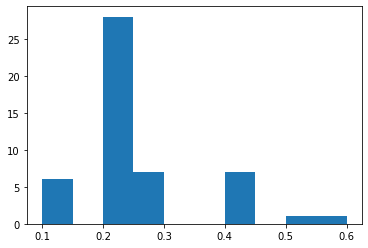

In [22]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se crea la grafica por medio del metodo plot
plt.hist(df_iris.query('clase == "Iris-setosa"').ancho_petalo)

# Se visualiza la grafica de Scatter Plot
plt.show()

Podriamos pasar el capitulo completo, divirtiendonos con el metodo `plot` pero no es el proposito principal de este Notebook. Volvamos y tratemos de graficar las barras por el tipo de clases de iris.

In [ ]:
# Incluir el grafico de barras

## Incluir las varientas del grafico de barras, horizontal, vertical, vertical stacked, horizontal stacked bar

## Graficas de Linea

Incluir ejemplos de graficas de linea aunque el dataset de pronto no se ajuste

## Graficas de Pie

Incluir ejemplos de graficas de pie

## Graficas de Scatterplot

Incluir ejemplos de graficas de pie